RNN

\begin{eqnarray}
s(t) & = & f(b_{s} + U_{sx} x(t) + U_{ss} s(t-1) ) \\
h(t) & = & g(b_{h} + U_{hs} s(t-1) ) \\
\end{eqnarray}

## LSTM

Assume $x(0,t) = 1 $ to get rid of the separate bias parameters.


\begin{align}
x(t) & & \text{Input} \\
i(t) & =  \sigma(U_{i} [x(t),  h(t-1) ] ) & \text{Input Gates} \\
f(t) & =  \sigma(U_{f} [x(t),  h(t-1) ] ) & \text{Forget Gates} \\
\tilde{s}(t) & =  \tanh(U_{s} [ x(t), h(t-1) ] ) & \text{Proposed Memory} \\
s(t) & =  f(t) \odot s(t-1) + i(t) \odot \tilde{s}(t) & \text{Memory} \\
o(t) & =  \sigma(U_{o} [ x(t), h(t-1) ] ) & \text{Output Gates} \\
h(t) & =  o(t) \odot \tanh(s(t)) & \text{Output} \\
\end{align}

## LSTM variation


\begin{eqnarray}
i(t) & = & \sigma(U_{i} [x(t),  h(t-1), s(t-1) ] ) \\
f(t) & = & \sigma(U_{f} [x(t),  h(t-1), s(t-1) ] ) \\
\tilde{s}(t) & = & \tanh(U_{s} [ x(t), h(t-1) ] ) \\
s(t) & = & f(t) \odot s(t-1) + i(t) \odot \tilde{s}(t) \\
o(t) & = & \sigma(U_{o} [ x(t), h(t-1), s(t) ] ) \\
h(t) & = & o(t) \odot \tanh(s(t)) \\
\end{eqnarray}

Can we learn a jumping ball with an LSTM?

\begin{eqnarray}
x
\end{eqnarray}

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

x = np.linspace(-3,3,100)
plt.plot(x, tanh(x))
plt.plot(x, 2*sigmoid(2*x)-1, 'r')
plt.show()

In [58]:
Nh = 20
Nx = 6+1
Ns = Nh
No = Ns


Ni = Ns
Nf = Ns

Uix = np.random.randn(Ni, Nx)
Uih = np.random.randn(Ni, Nh)
Uis = np.random.randn(Ni, Ns)
Ufx = np.random.randn(Nf, Nx)
Ufh = np.random.randn(Nf, Nh)
Ufs = np.random.randn(Nf, Ns)

Usx = np.random.randn(Ns, Nx)
Ush = np.random.randn(Ns, Nh)

Uox = np.random.randn(Ni, Nx)
Uoh = np.random.randn(Ni, Nh)
Uos = np.random.randn(Ni, Ns)

T = 50

x = np.random.randn(Nx, T)
x[0,:] = 1
h = np.random.randn(Nh, T)
h0 = np.random.randn(Nh, 1)
s = np.random.randn(Ns, T)
s0 = np.random.randn(Ns, 1)
sbar = np.random.randn(Ns, T)
o = np.random.randn(Ns, T)

i = np.random.randn(Ni, T)  
f = np.random.randn(Nf, T)  
for t in range(T):
    if t==0:
        i[:,t] = sigmoid(Uix.dot(x[:,t]) + Uih.dot(h0).T + Uis.dot(s0).T)
        f[:,t] = sigmoid(Ufx.dot(x[:,t]) + Ufh.dot(h0).T + Ufs.dot(s0).T)
        sbar[:,t] = np.tanh(Usx.dot(x[:,t]) + Ush.dot(h0).T) 
        s[:,t] = f[:,t]*s0.T + i[:,t]*sbar[:,t]
        o[:,t] = sigmoid(Uox.dot(x[:,t]) + Uoh.dot(h0).T + Uos.dot(s[:,t]))
    else:
        i[:,t] = sigmoid(Uix.dot(x[:,t]) + Uih.dot(h[:,t-1]) + Uis.dot(s[:,t-1]))
        f[:,t] = sigmoid(Ufx.dot(x[:,t]) + Ufh.dot(h[:,t-1]) + Ufs.dot(s[:,t-1]))
        sbar[:,t] = np.tanh(Usx.dot(x[:,t]) + Ush.dot(h[:,t-1])) 
        s[:,t] = f[:,t]*s[:,t-1] + i[:,t]*sbar[:,t]
        o[:,t] = sigmoid(Uox.dot(x[:,t]) + Uoh.dot(h[:,t-1]) + Uos.dot(s[:,t]))
    
    h[:,t] = o[:,t]*np.tanh(s[:,t])
                         
        
        



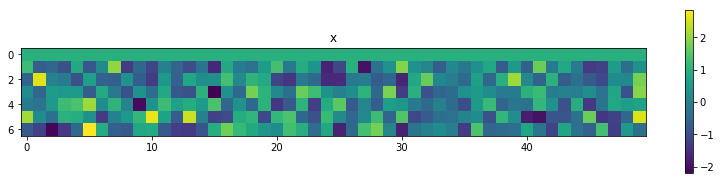

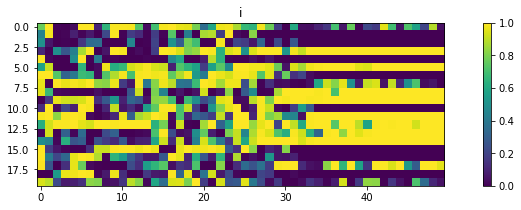

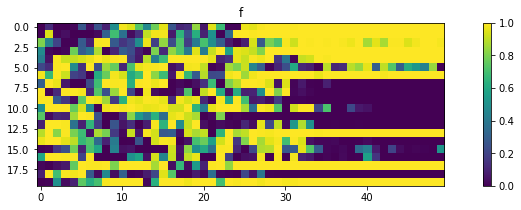

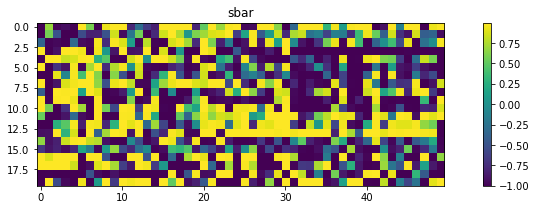

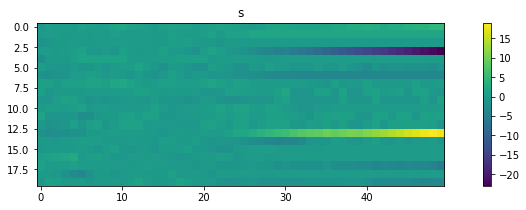

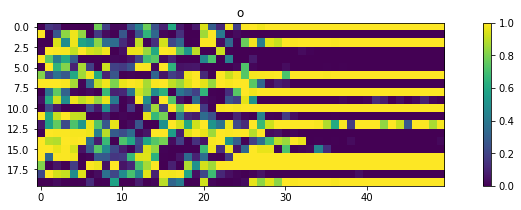

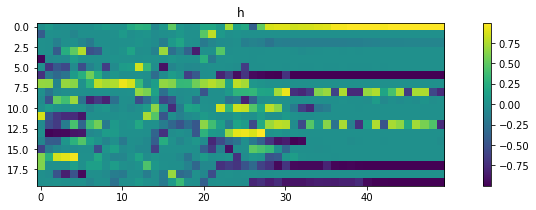

In [59]:
plt.figure(figsize=(14,3))
plt.imshow(x)
plt.title('x')
plt.colorbar()
plt.show()
plt.figure(figsize=(14,3))
plt.imshow(i)
plt.title('i')
plt.colorbar()
plt.show()
plt.figure(figsize=(14,3))
plt.imshow(f)
plt.title('f')
plt.colorbar()
plt.show()
plt.figure(figsize=(14,3))
plt.imshow(sbar)
plt.title('sbar')
plt.colorbar()
plt.show()
plt.figure(figsize=(14,3))
plt.imshow(s)
plt.title('s')
plt.colorbar()
plt.show()
plt.figure(figsize=(14,3))
plt.imshow(o)
plt.title('o')
plt.colorbar()
plt.show()
plt.figure(figsize=(14,3))
plt.imshow(h)
plt.title('h')
plt.colorbar()
plt.show()

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd


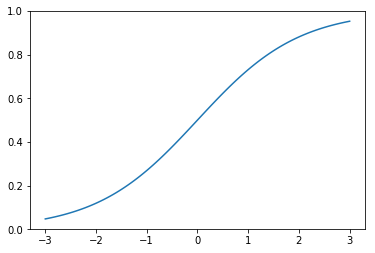

In [18]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.linspace(-3,3,100)
plt.plot(x, sigmoid(x))
plt.show()

$$\tan(x) = \frac{\sin(x)}{\cos(x)}$$

$$\sin(x) = \frac{1}{2}(\exp(jx)-\exp(-jx))$$

$$\cos(x) = \frac{1}{2}(\exp(jx)+\exp(-jx))$$


$$\tanh(x) = \frac{\sinh(x)}{\cosh(x)}$$

$$\sinh(x) = \frac{1}{2}(\exp(x)-\exp(-x))$$

$$\cosh(x) = \frac{1}{2}(\exp(x)+\exp(-x))$$


$$\tanh(x) = \sigma(2x) - \sigma(-2x)$$


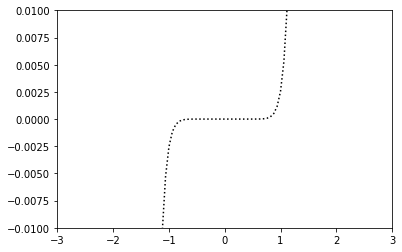

In [19]:
def sinh(x):
    return 0.5*(np.exp(x)-np.exp(-x))

def cosh(x):
    return 0.5*(np.exp(x)+np.exp(-x))

def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def poly(x):
    return x - x**3/3 + 2*x**5/15 - 17*x**7/315 + 62*x**9/2835 - 1382*x**11/155925

x = np.linspace(-3,3,100)
#plt.plot(x, )
plt.plot(x, tanh(x) - poly(x), 'k:')
plt.gca().set_ylim([-0.01, 0.01])
plt.gca().set_xlim([-3., 3.])
plt.show()

#alpha = 2
#plt.plot(x, sinh(x))
#plt.show()

Gated Recurrent Unit (GRU) RNN 

\begin{eqnarray}
i(t) & = & \sigma(b_{i} + U_{ix} x(t) + U_{ih} h(t-1)  ) \\
f(t) & = & \sigma(b_{f} + U_{fx} x(t) + U_{fh} h(t-1) ) \\
s(t) & = & \tanh(b_s + U_{sx}x(t) + U_{ss} (i(t) \odot h(t-1)) ) \\
h(t) & = & (1- f(t)) \odot h(t-1) + f(t) \odot s(t) 
\end{eqnarray}

Goodfellow et. al.

\begin{eqnarray}
S(i,t) & = & S(i, t-1) \sigma\left(b_f(i) + \sum_{j} U_f(i,j) x(j, t) + \sum_{j} W_f(i, j) h(j, t-1) \right) +  \sigma\left( b_g(i) + \sum_{j} U_g(i,j) x(j, t) + \sum_{j} W_g(i, j) h(j, t-1) \right)  \sigma\left( b_s(i) + \sum_{j} U_s(i,j) x(j, t) + \sum_{j} W_s(i, j) h(j, t-1) \right) \\
H(i, t) & = & \tanh(S(i,t)) \sigma\left( b_o(i) + \sum_{j} U_o(i,j) x(j, t) + \sum_{j} W_o(i, j) h(j, t-1) \right)
\end{eqnarray}

\begin{eqnarray}
S(t) & = & S(t-1) \sigma\left(b_f + U_f x(t) + W_f h(t-1) \right) +  \sigma\left( b_g + U_g x(t) + W_g h(t-1) \right)  \sigma\left( b_s + U_s x(t) + W_s h(t-1) \right) \\
h(t) & = & \tanh(S(t)) \sigma\left( b_o + U_o x(t) +  W_o h(t-1) \right)
\end{eqnarray}

http://colah.github.io/posts/2015-08-Understanding-LSTMs/

arxiv1705.08052



In [3]:
import numpy as np
import torch 

np.random.seed(2)

T = 20
L = 1000
N = 100

x = np.empty((N, L), 'int64')
x[:] = np.array(range(L)) + np.random.randint(-4 * T, 4 * T, N).reshape(N, 1)
data = np.sin(x / 1.0 / T).astype('float64')
#torch.save(data, open('traindata.pt', 'wb'))

In [10]:
data.shape

(100, 1000)

Example from pytorch tutorial


In [6]:
%matplotlib inline
from __future__ import print_function
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import numpy as np
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

class Sequence(nn.Module):
    def __init__(self):
        super(Sequence, self).__init__()
        self.lstm1 = nn.LSTMCell(1, 51)
        self.lstm2 = nn.LSTMCell(51, 51)
        self.linear = nn.Linear(51, 1)

    def forward(self, input, future = 0):
        outputs = []
        h_t = Variable(torch.zeros(input.size(0), 51).double(), requires_grad=False)
        c_t = Variable(torch.zeros(input.size(0), 51).double(), requires_grad=False)
        h_t2 = Variable(torch.zeros(input.size(0), 51).double(), requires_grad=False)
        c_t2 = Variable(torch.zeros(input.size(0), 51).double(), requires_grad=False)

        for i, input_t in enumerate(input.chunk(input.size(1), dim=1)):
            h_t, c_t = self.lstm1(input_t, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs += [output]
        for i in range(future):# if we should predict the future
            h_t, c_t = self.lstm1(output, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs += [output]
        outputs = torch.stack(outputs, 1).squeeze(2)
        return outputs

STEP:  0
loss: 0.520363350937
loss: 0.512229799748
loss: 0.484058280042
loss: 0.46459071684
loss: 0.374606501428
loss: 26.3772836245
loss: 0.780855096968
loss: 0.222296263572
loss: 0.116127133006
loss: 1.11775618017
loss: 0.0320657779606
loss: 0.0279428710386
loss: 0.0257227341566
loss: 0.0249875217876
loss: 0.0238867195271
loss: 0.0220747701388
loss: 0.0192094236946
loss: 0.015186273865
loss: 0.00750332555624
loss: 0.00597948399275
test loss: 0.00515258112353


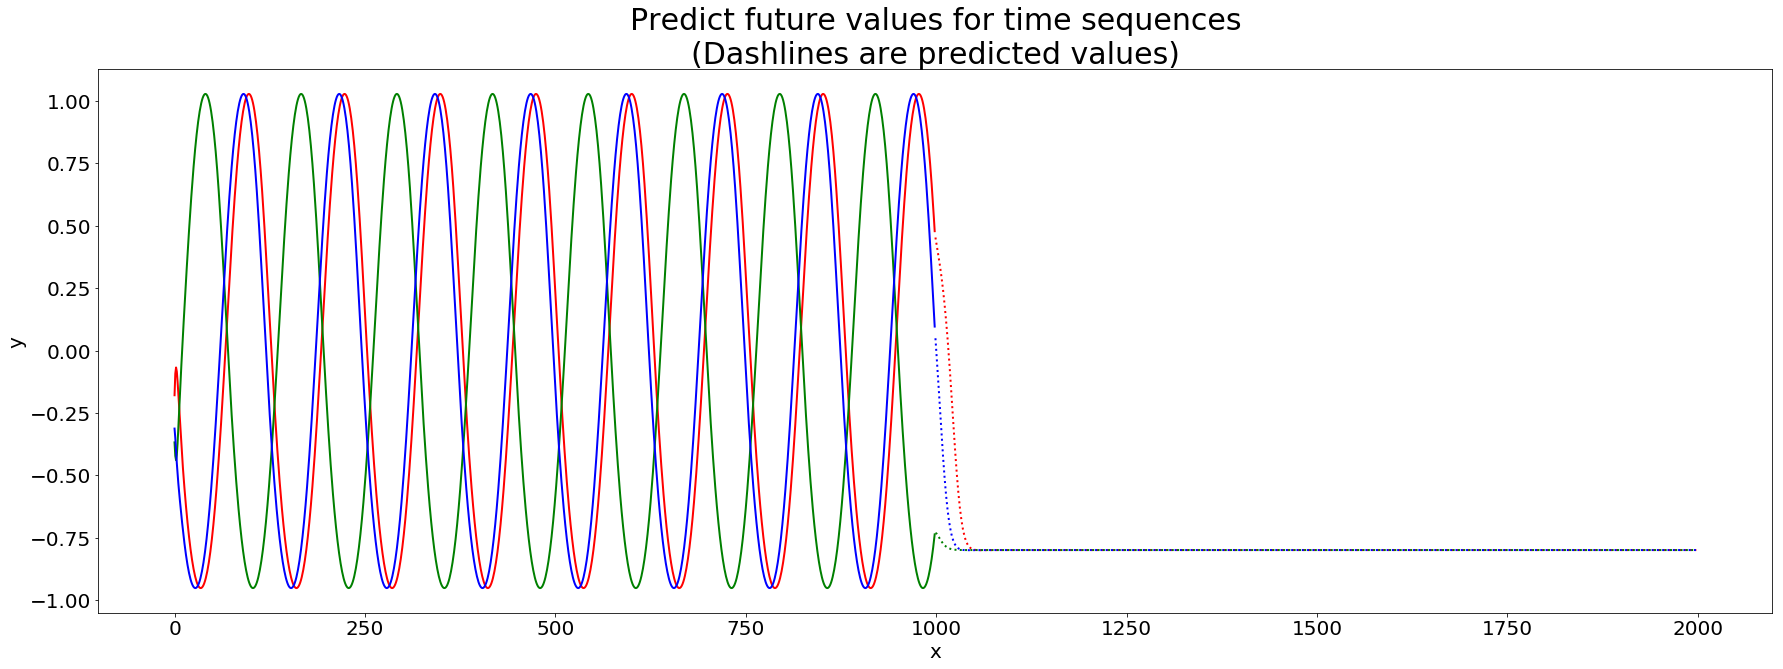

STEP:  1
loss: 0.00536874418953
loss: 0.00427795478416
loss: 0.00371197449835
loss: 0.00281342929268
loss: 0.0023540215669
loss: 0.00159618217437
loss: 0.000853790467357
loss: 0.000574718243883
loss: 0.000433294890882
loss: 0.000411904923025
loss: 0.000408734000047
loss: 0.000407004469513
loss: 0.000405167915999
loss: 0.000400733640183
loss: 0.000390849500799
loss: 0.000369033067093
loss: 0.000322517308307
loss: 0.000271591402057
loss: 0.000244462376705
loss: 0.00021664245892
test loss: 8.65886050454e-05


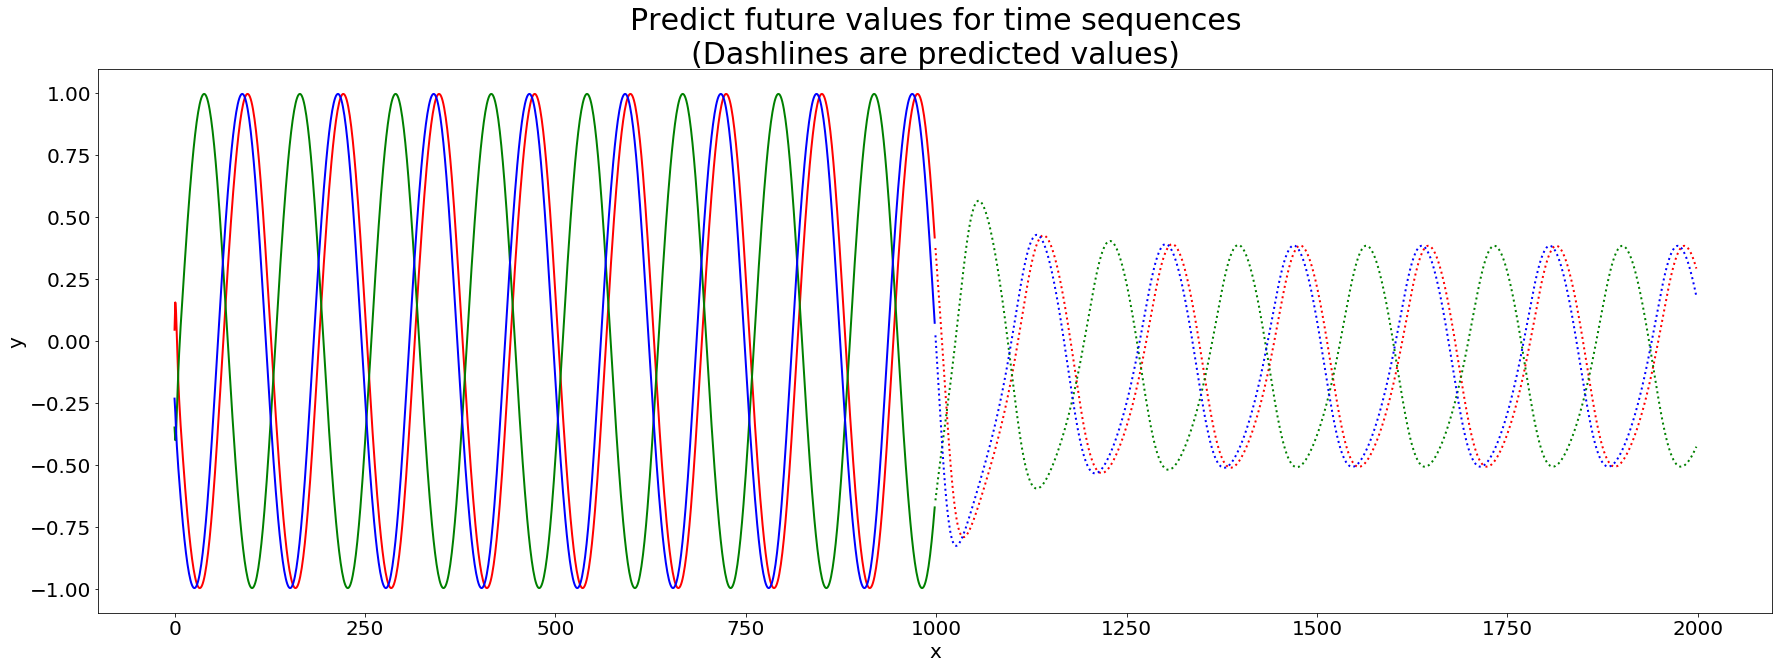

STEP:  2
loss: 0.000196932650872
loss: 0.000188699446549
loss: 0.000185834169533
loss: 0.000184592454114
loss: 0.000183984867327
loss: 0.000182869977825
loss: 0.000182303110565
loss: 0.000181890481638
loss: 0.000181450217105
loss: 0.00018105353019
loss: 0.000180270752798
loss: 0.000178687319708
loss: 0.000175406340074
loss: 0.000169308524459
loss: 0.000160692432459
loss: 0.000151301758312
loss: 0.000144166536618
loss: 0.000140343239384
loss: 0.000138979400917
loss: 0.000138134684472
test loss: 4.3080363828e-05


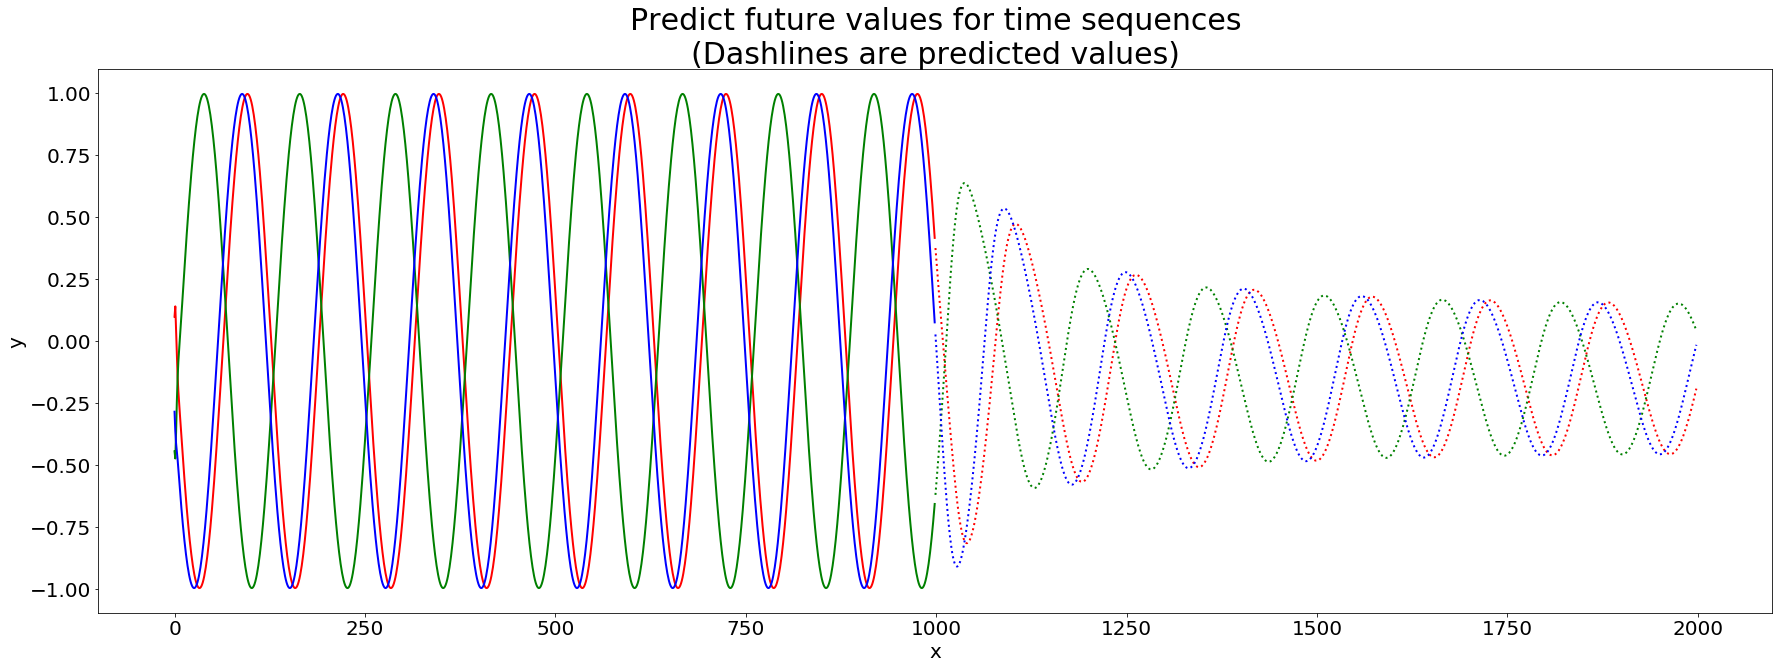

STEP:  3
loss: 0.000137168232004
loss: 0.000136137667853
loss: 0.000135407086984
loss: 0.00013435020346
loss: 0.000133487814994
loss: 0.000131587665792
loss: 0.0001276724934
loss: 0.000120297374545
loss: 0.000109340399024
loss: 9.77069968701e-05
loss: 8.84666452383e-05
loss: 8.82198602467e-05
loss: 8.07135317651e-05
loss: 7.92639434772e-05
loss: 7.71356520198e-05
loss: 7.52381858551e-05
loss: 7.45864229795e-05
loss: 7.4308483495e-05
loss: 7.36861378192e-05
loss: 7.16850100509e-05
test loss: 3.85570874497e-05


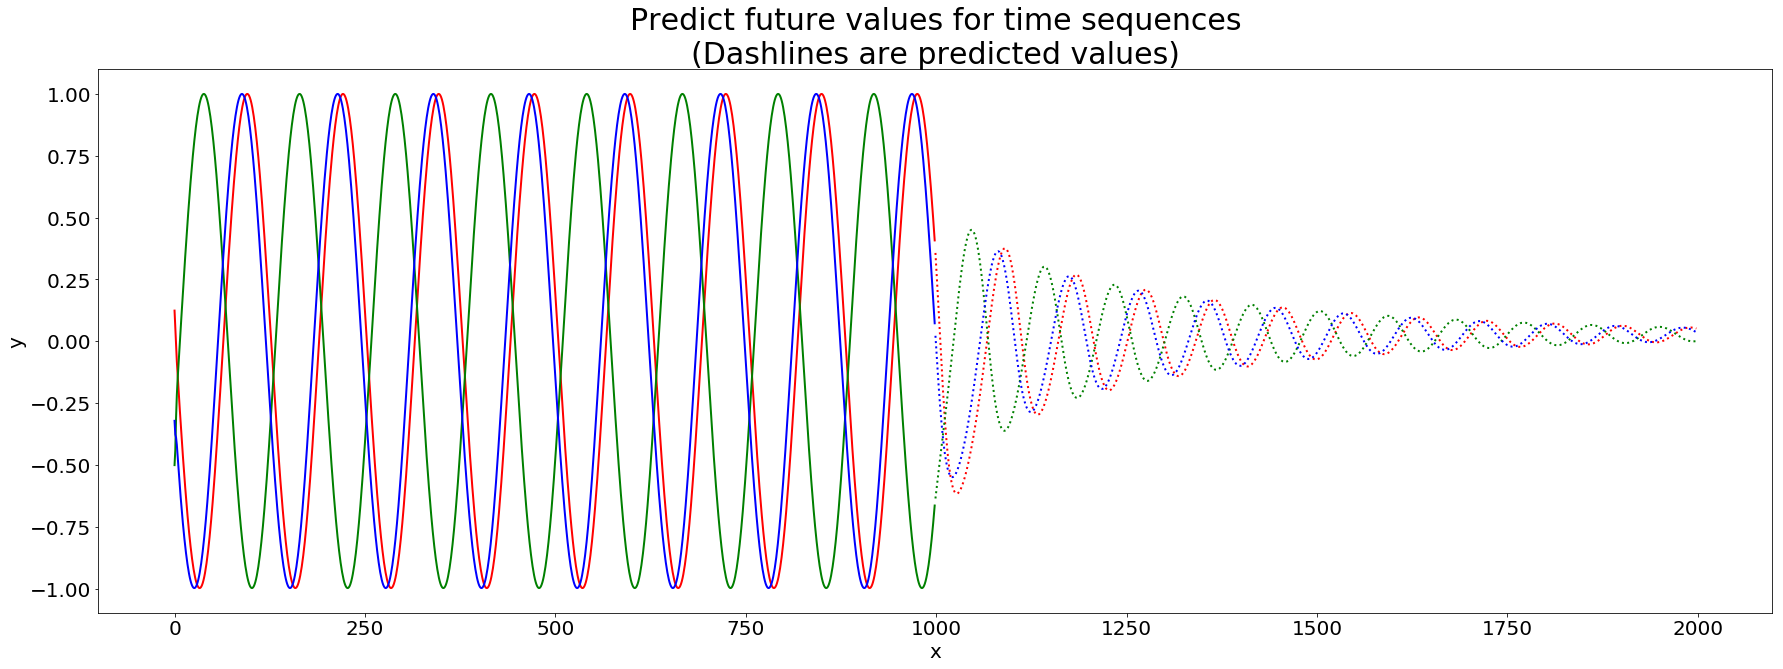

STEP:  4
loss: 6.94980677258e-05
loss: 6.67116050325e-05
loss: 6.50965411262e-05
loss: 6.36584438096e-05
loss: 6.16032326465e-05
loss: 5.78456657301e-05
loss: 4.75360101953e-05
loss: 3.99057619271e-05
loss: 4.56810466503e-05
loss: 3.69191120805e-05
loss: 3.05822475781e-05
loss: 2.94444127016e-05
loss: 2.75071060643e-05
loss: 2.66033108203e-05
loss: 2.6387840572e-05
loss: 2.63536927849e-05
loss: 2.63181725527e-05
loss: 2.62463991316e-05
loss: 2.61010743991e-05
loss: 2.58712929324e-05
test loss: 2.42324430741e-05


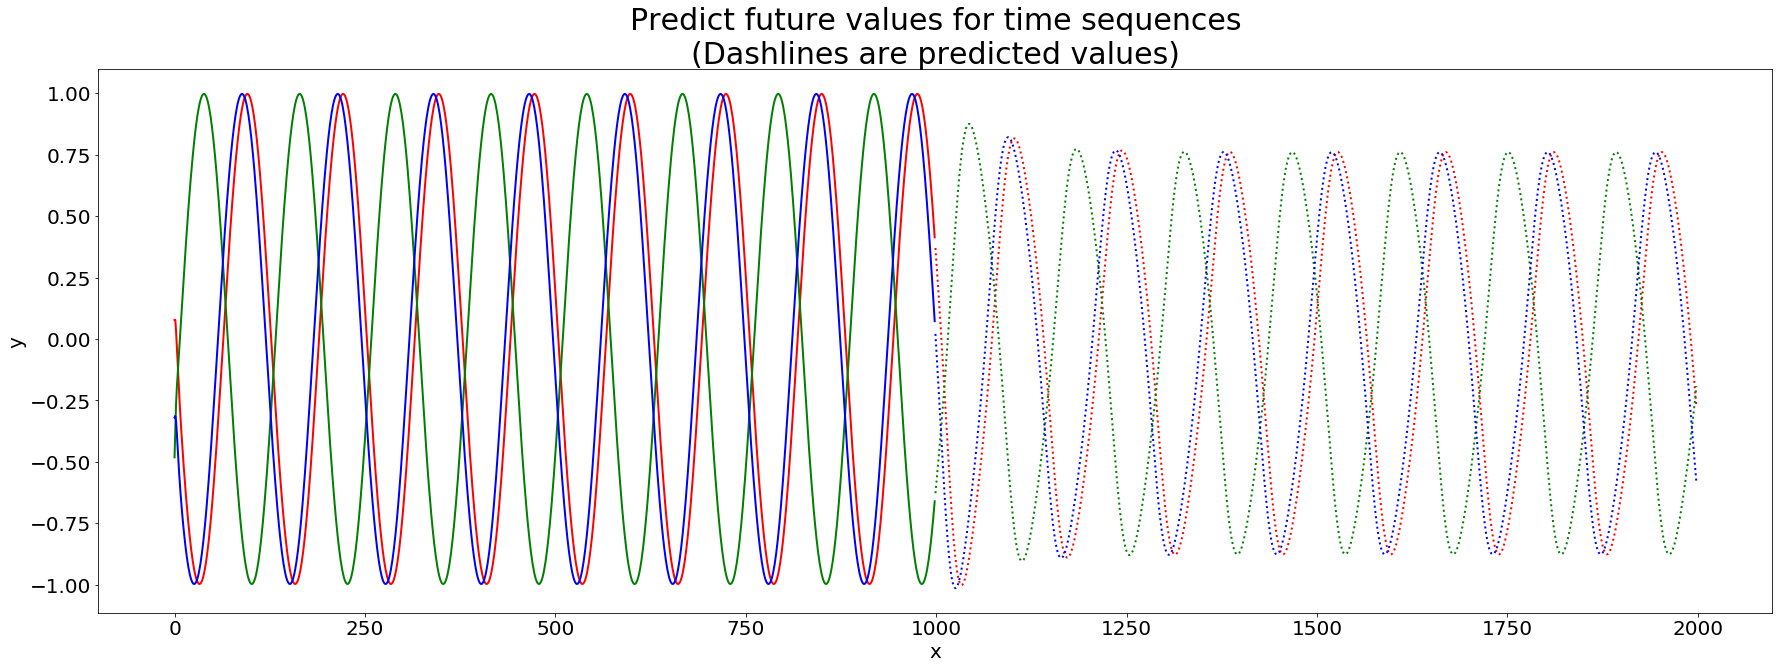

STEP:  5
loss: 2.5663248675e-05
loss: 2.551856876e-05
loss: 2.53918023381e-05
loss: 2.5286226974e-05
loss: 2.5200850893e-05
loss: 2.5071788757e-05
loss: 2.48606370342e-05
loss: 2.40798556957e-05
loss: 2.17230775045e-05
loss: 1.91300536831e-05
loss: 2.01201967146e-05
loss: 2.26385420488e-05
loss: 1.62378363939e-05
loss: 1.5004650388e-05
loss: 1.43260389332e-05
loss: 1.36614469403e-05
loss: 1.33662617168e-05
loss: 1.29947249201e-05
loss: 1.26451980168e-05
loss: 1.21580186151e-05
test loss: 1.30158980996e-05


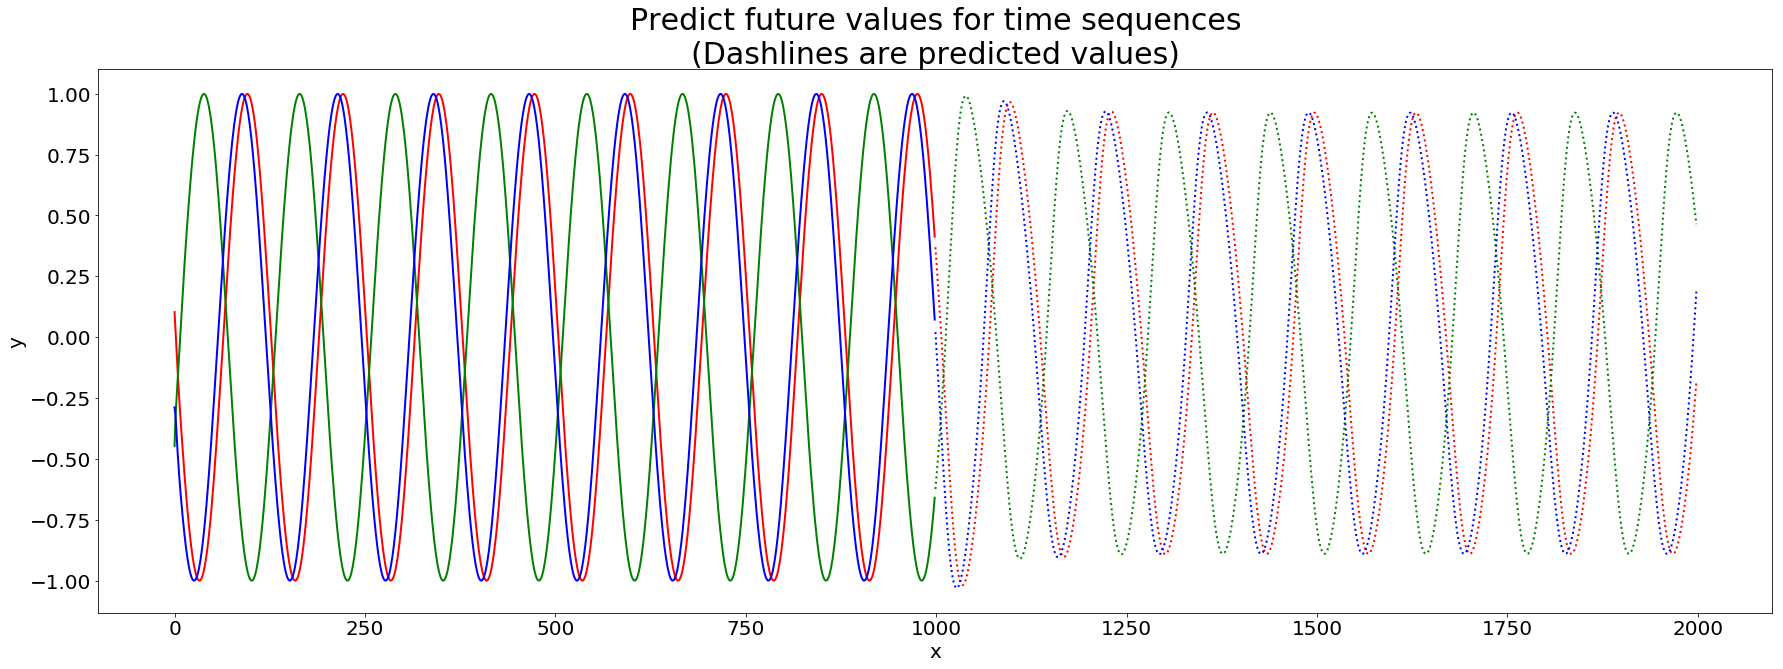

STEP:  6
loss: 1.15001535552e-05
loss: 1.11243140021e-05
loss: 1.09420805307e-05
loss: 1.07320206451e-05
loss: 1.06535371655e-05
loss: 1.06129276405e-05
loss: 1.06035162078e-05
loss: 1.05979279276e-05
loss: 1.05849738261e-05
loss: 1.0540854995e-05
loss: 1.0420843336e-05
loss: 1.01898886916e-05
loss: 9.80468313058e-06
loss: 9.3905307933e-06
loss: 9.07435523018e-06
loss: 8.6980778888e-06
loss: 8.09743331461e-06
loss: 7.58227940739e-06
loss: 7.06638637683e-06
loss: 6.86938485103e-06
test loss: 1.00684116453e-05


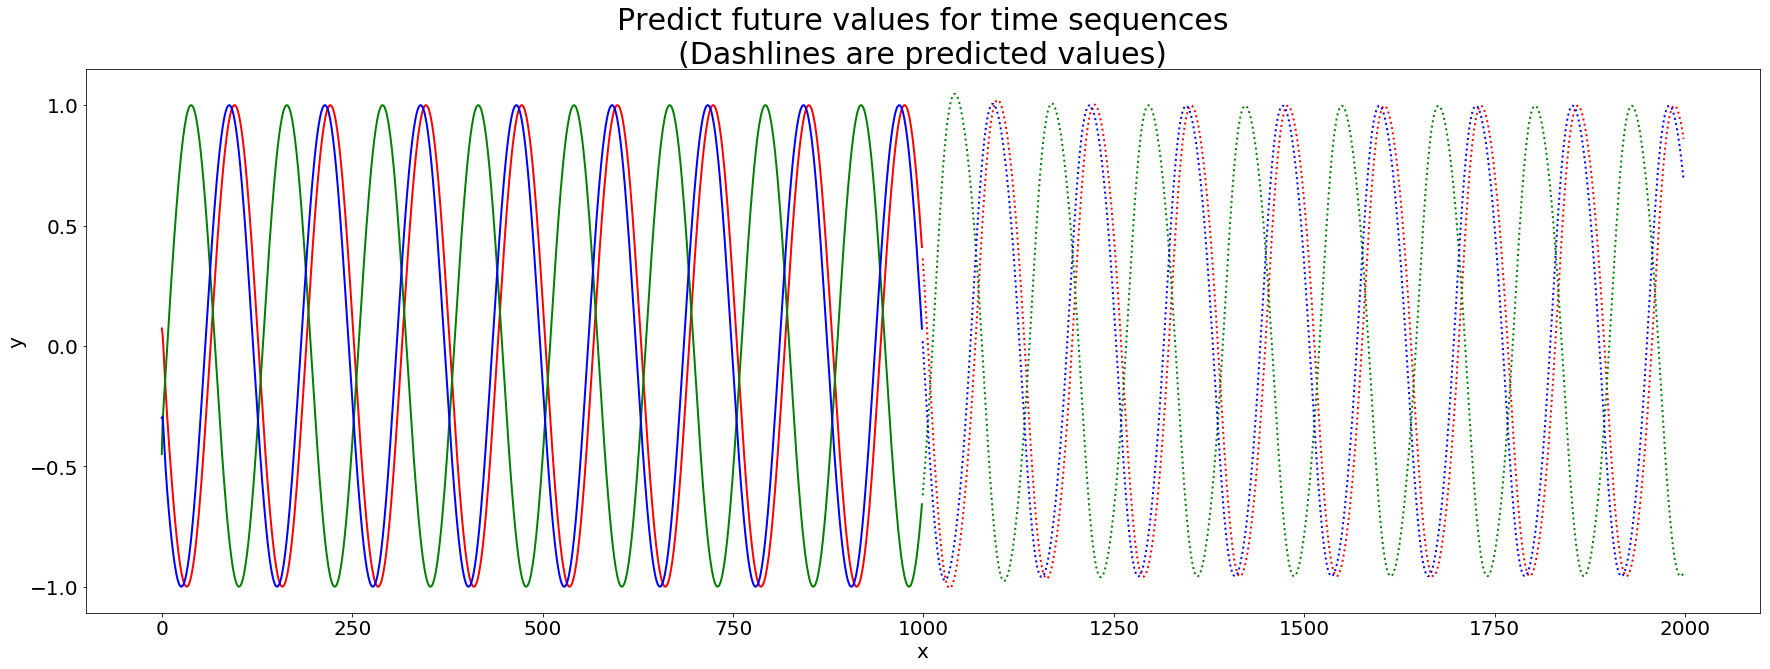

STEP:  7
loss: 6.84785120308e-06
loss: 6.78658324798e-06
loss: 6.76971726943e-06
loss: 6.76296350714e-06
loss: 6.73866610286e-06
loss: 6.73016081233e-06
loss: 6.71969898218e-06
loss: 6.67650462006e-06
loss: 6.56716326019e-06
loss: 6.37714450174e-06
loss: 6.01173332219e-06
loss: 5.86234973863e-06
loss: 5.19376789381e-06
loss: 5.03026932517e-06
loss: 4.85498119426e-06
loss: 4.73385272707e-06
loss: 4.70482098401e-06
loss: 4.69067637342e-06
loss: 4.67893934946e-06
loss: 4.67237220601e-06
test loss: 7.44708244647e-06


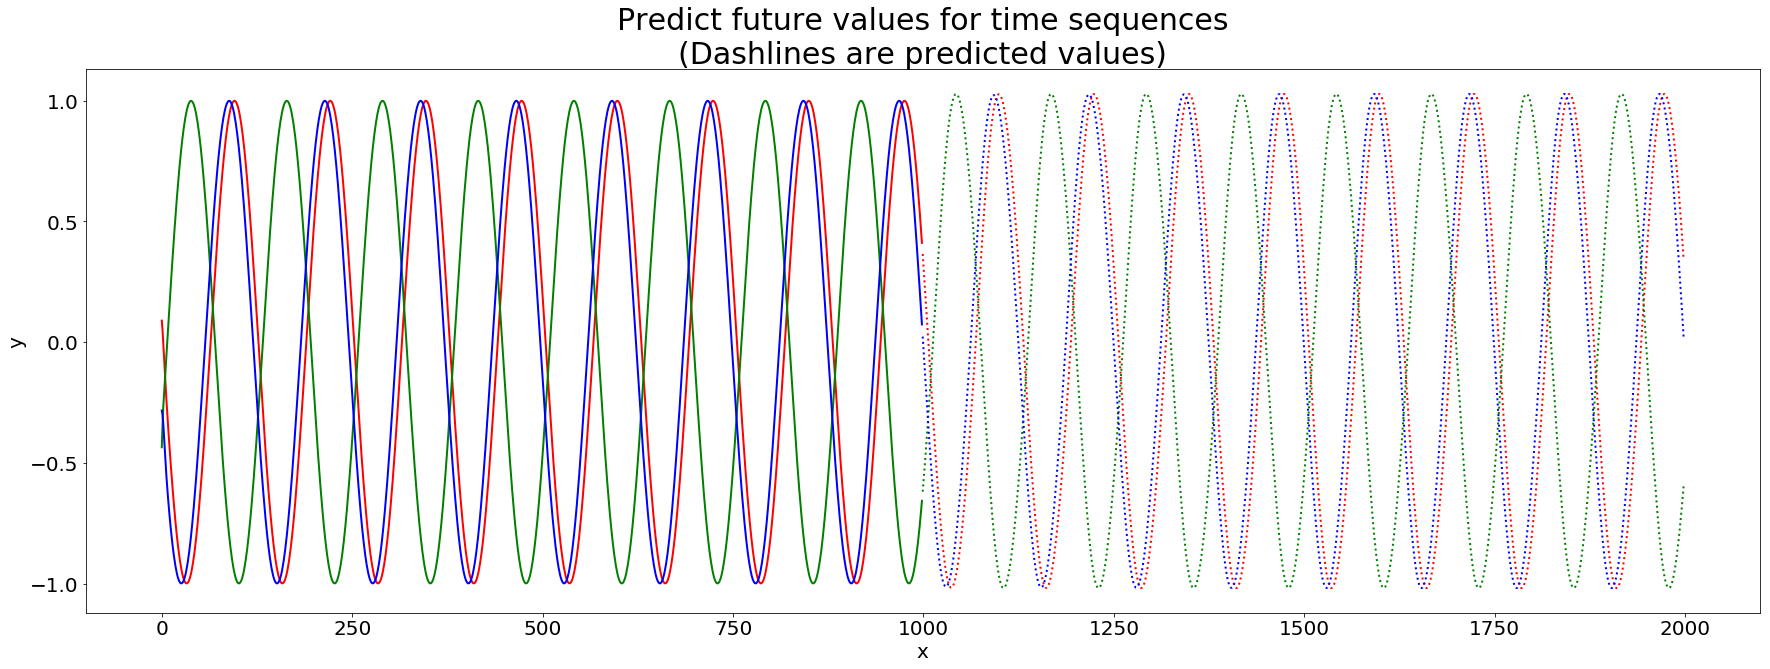

STEP:  8
loss: 4.6640622501e-06
loss: 4.65489183523e-06
loss: 4.64886726509e-06
loss: 4.6437570969e-06
loss: 4.64003885734e-06
loss: 4.63542986134e-06
loss: 4.62870215429e-06
loss: 4.61838784294e-06
loss: 4.60115241208e-06
loss: 4.58455554081e-06
loss: 4.57854265477e-06
loss: 4.57690777636e-06
loss: 4.57620088751e-06
test loss: 7.19916583688e-06


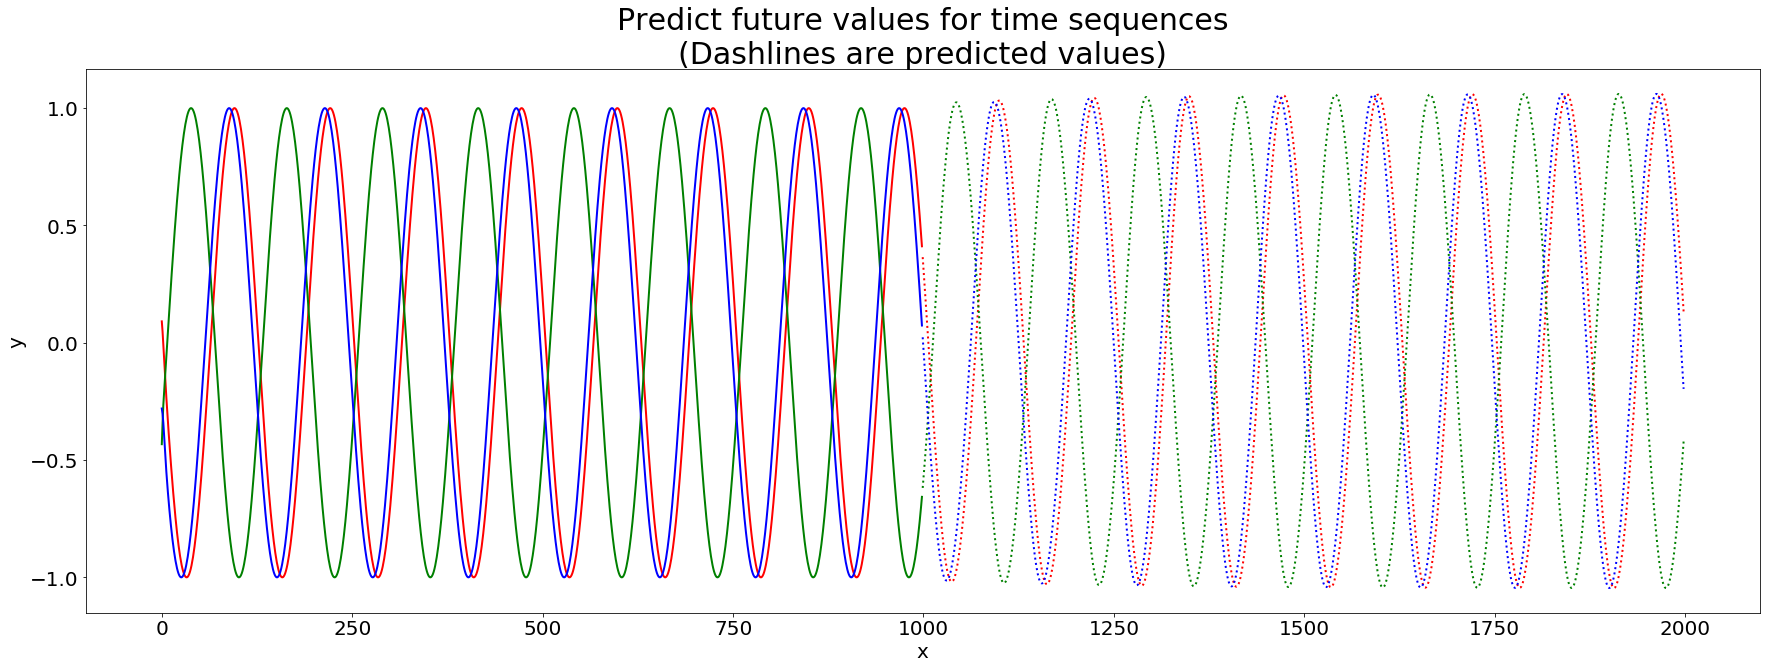

STEP:  9
loss: 4.57620088751e-06
loss: 4.57570820315e-06
test loss: 7.19936408249e-06


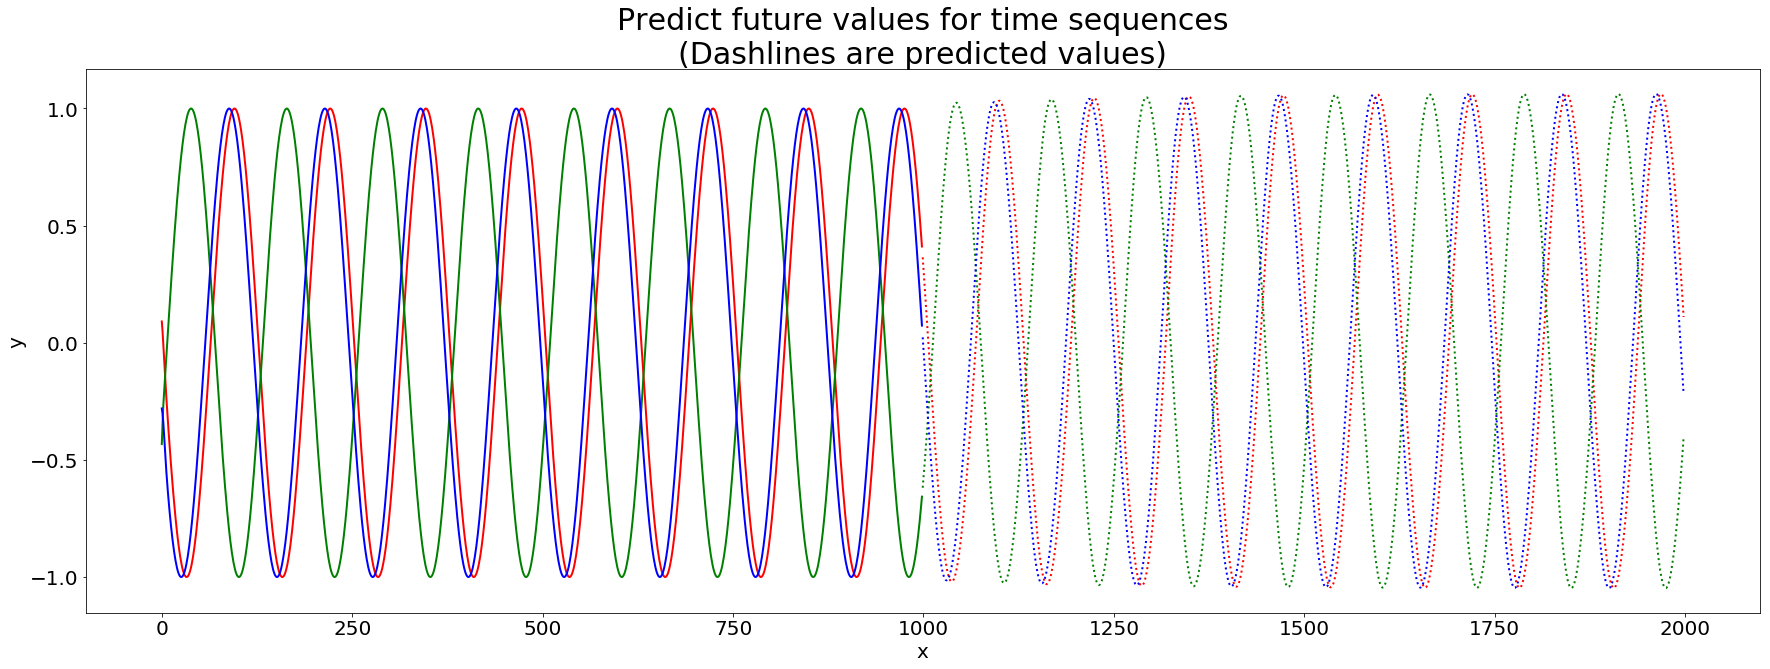

STEP:  10
loss: 4.57570820315e-06
loss: 4.57420844786e-06
loss: 4.5727775476e-06
loss: 4.56944705892e-06
loss: 4.56226642868e-06
loss: 4.54772926113e-06
loss: 4.5166777122e-06
loss: 4.44849099788e-06
loss: 4.36339220293e-06
loss: 4.45875684717e-06
loss: 4.23106083225e-06
loss: 4.27716212936e-06
loss: 4.21898927516e-06
loss: 4.21617569366e-06
loss: 4.20270595789e-06
loss: 4.19834134548e-06
loss: 4.17728527313e-06
loss: 4.15325194656e-06
loss: 4.14258949158e-06
loss: 4.13443100378e-06
test loss: 6.94339510832e-06


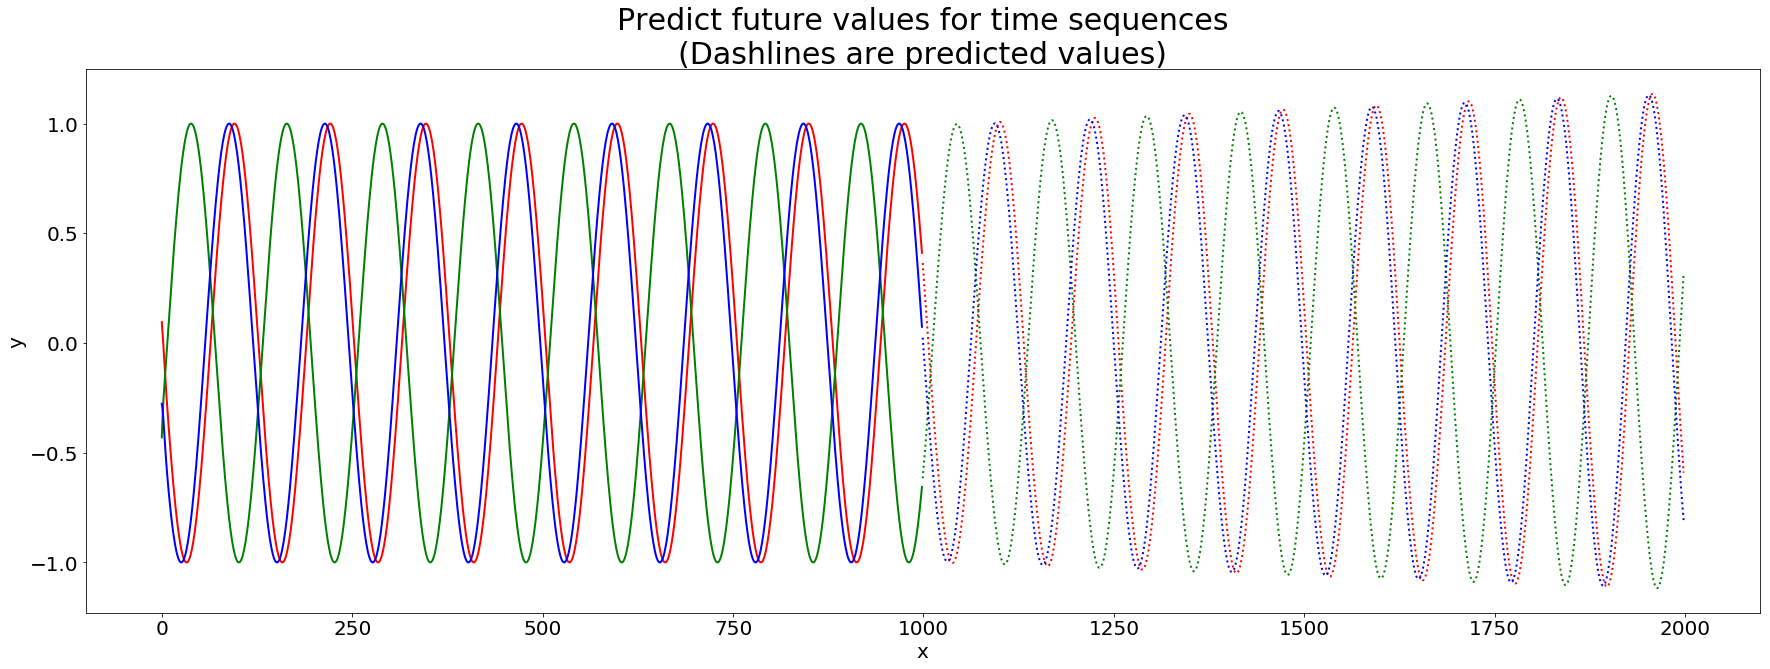

STEP:  11
loss: 4.13064996078e-06
loss: 4.12791051429e-06
loss: 4.12032141963e-06
loss: 4.11034099726e-06
loss: 4.10132645053e-06
loss: 4.11457344568e-06
loss: 4.09262719146e-06
loss: 4.089172694e-06
loss: 4.07719712185e-06
loss: 4.07170170704e-06
loss: 4.06525128026e-06
loss: 4.06032608878e-06
loss: 4.05538477276e-06
loss: 4.05355513384e-06
loss: 4.05262598656e-06
test loss: 7.06228503438e-06


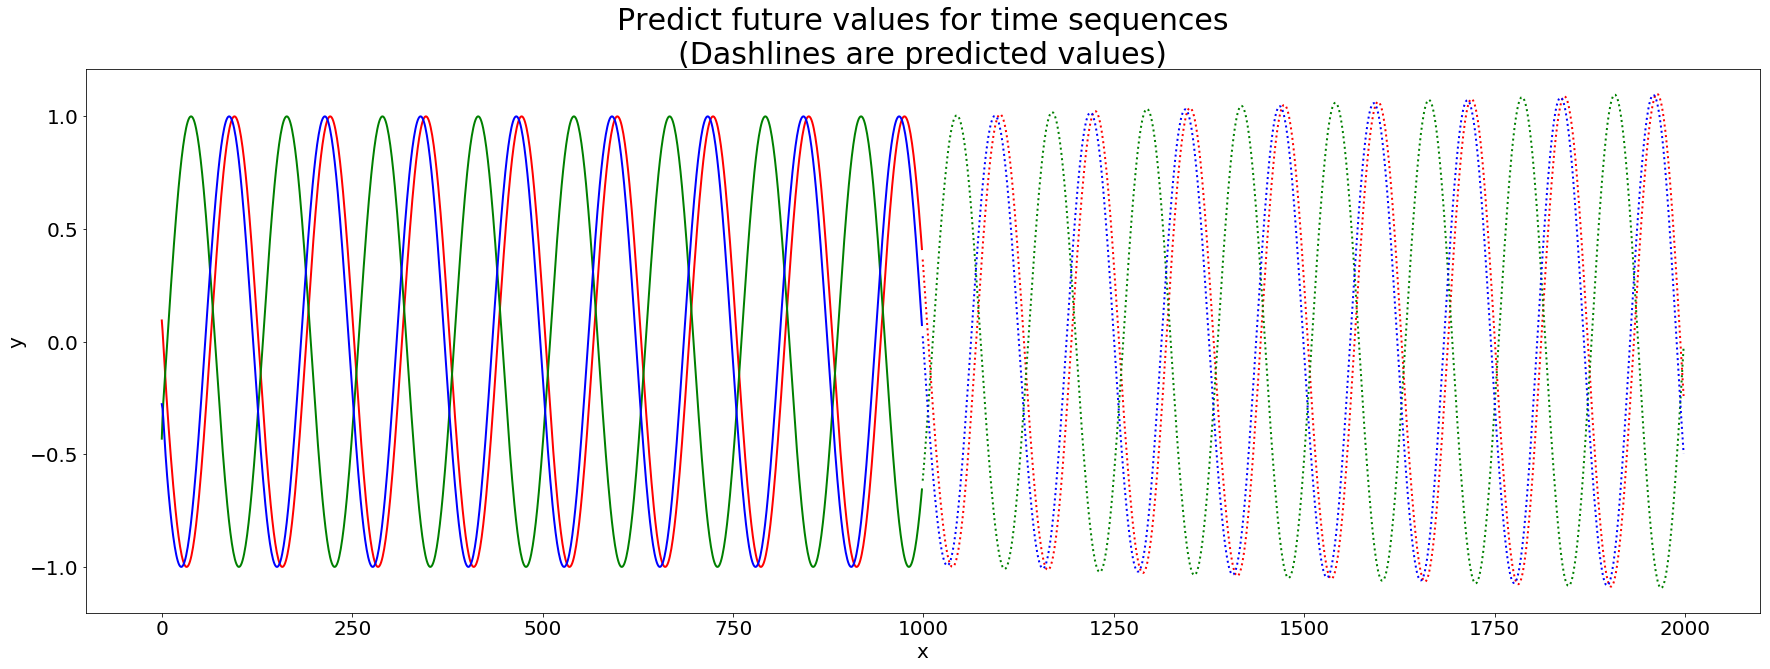

STEP:  12
loss: 4.05262598656e-06
loss: 4.05245724067e-06
test loss: 7.06492273064e-06


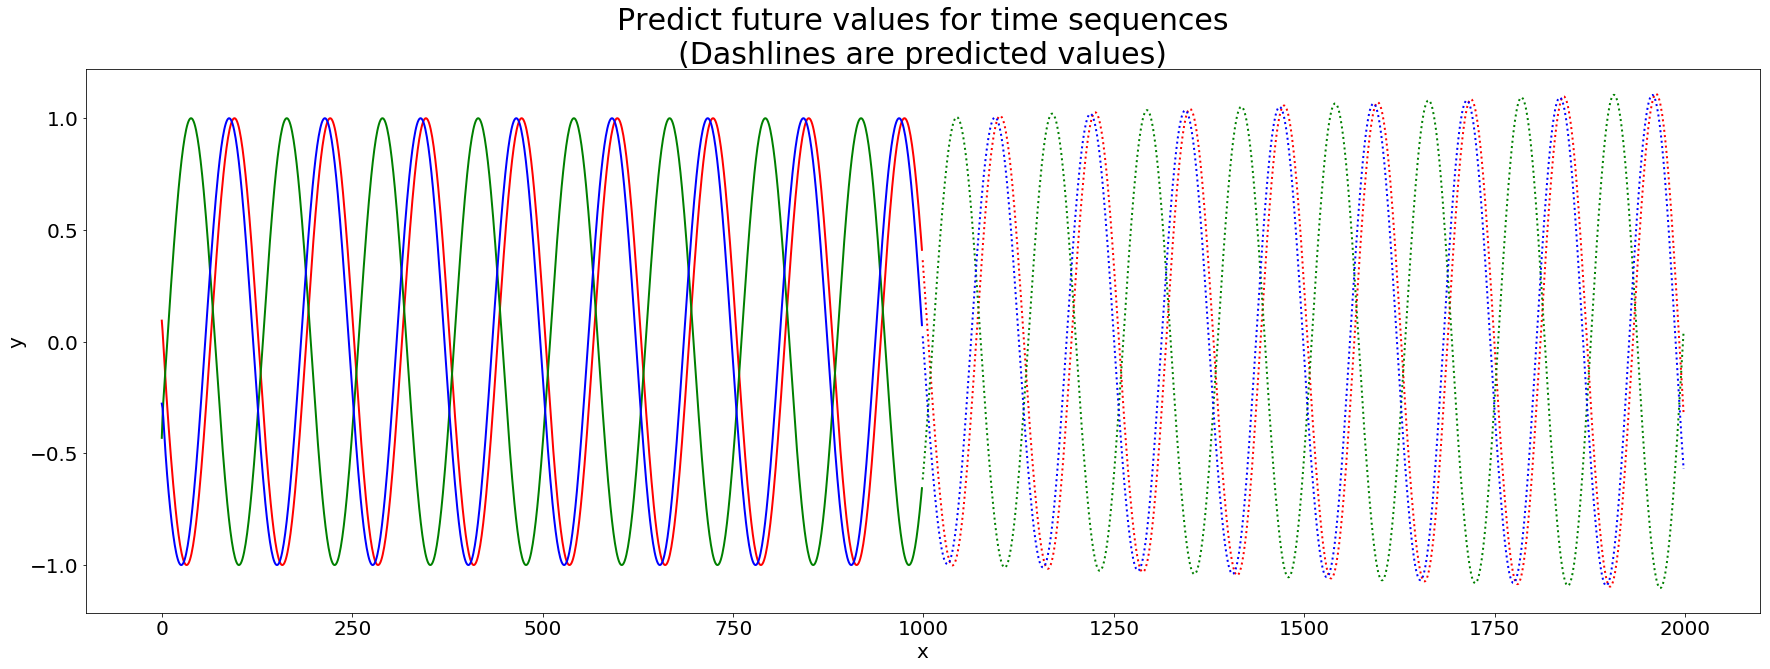

STEP:  13
loss: 4.05245724067e-06
loss: 4.05240519979e-06
test loss: 7.06368491879e-06


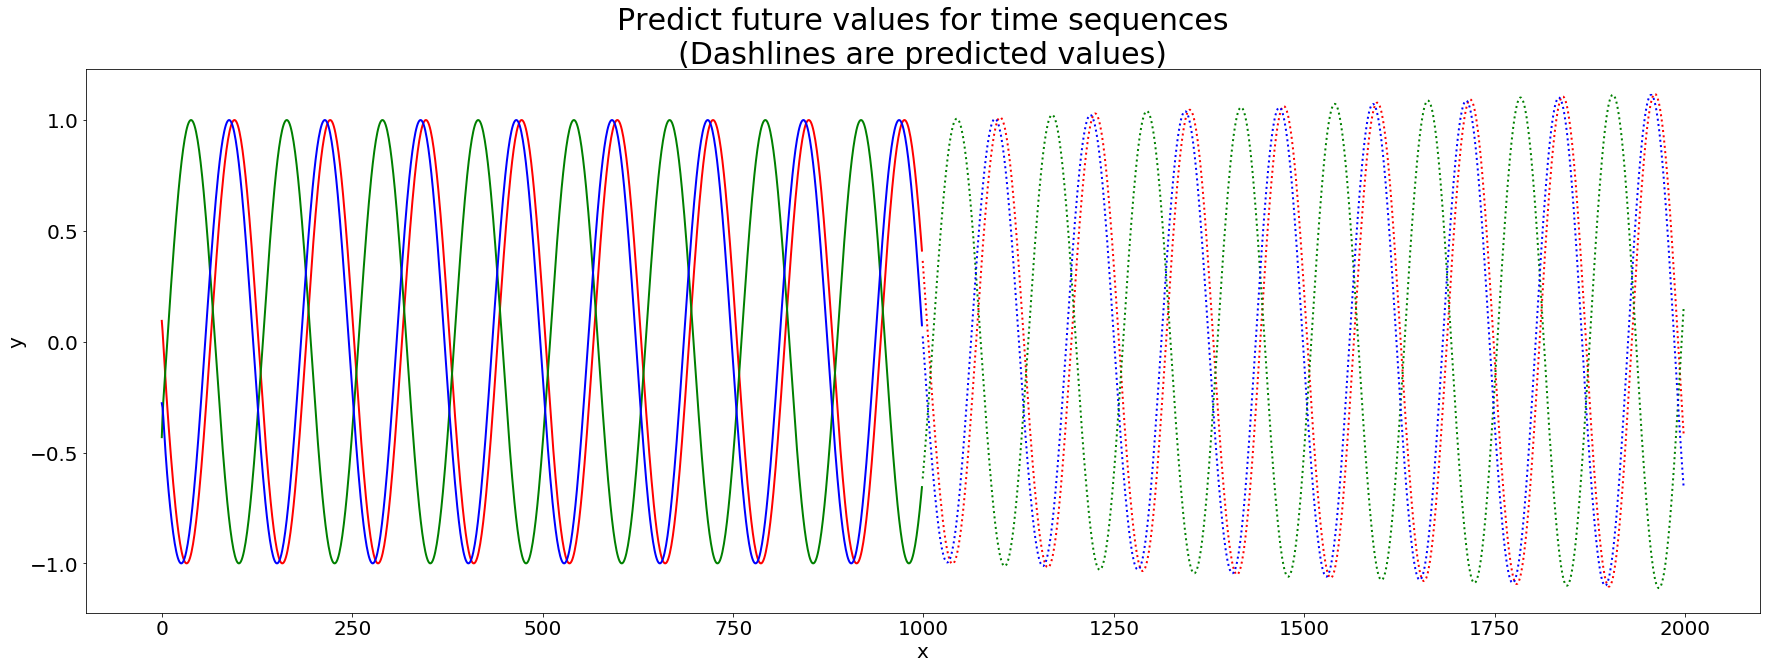

STEP:  14
loss: 4.05240519979e-06
loss: 4.05238072901e-06
test loss: 7.06480246217e-06


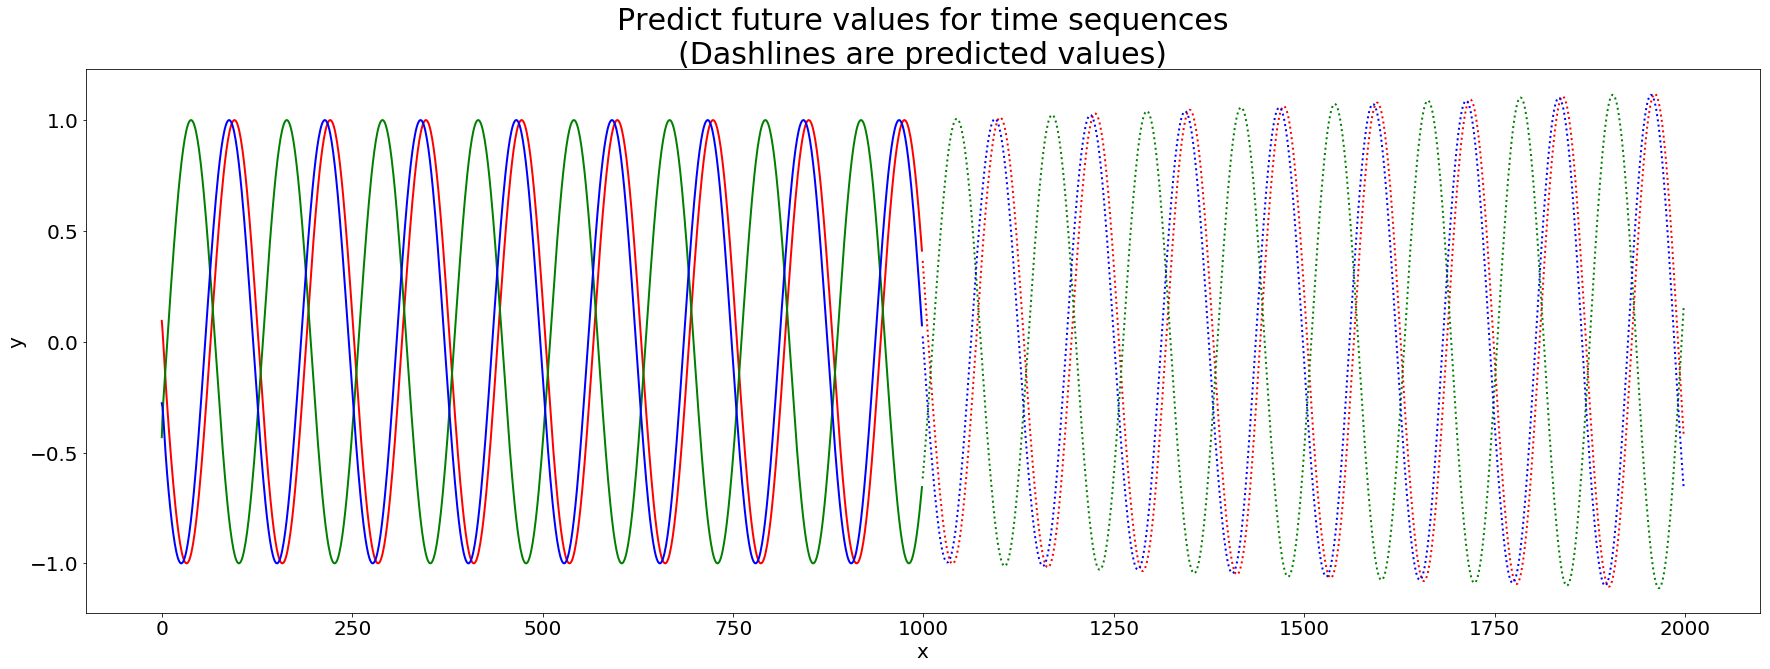

In [8]:
# set random seed to 0
np.random.seed(0)
torch.manual_seed(0)
# load data and make training set
data = torch.load('traindata.pt')
input = Variable(torch.from_numpy(data[3:, :-1]), requires_grad=False)
target = Variable(torch.from_numpy(data[3:, 1:]), requires_grad=False)
test_input = Variable(torch.from_numpy(data[:3, :-1]), requires_grad=False)
test_target = Variable(torch.from_numpy(data[:3, 1:]), requires_grad=False)
# build the model
seq = Sequence()
seq.double()
criterion = nn.MSELoss()
# use LBFGS as optimizer since we can load the whole data to train
optimizer = optim.LBFGS(seq.parameters(), lr=0.8)
    
    #begin to train
    for i in range(15):
        print('STEP: ', i)
        def closure():
            optimizer.zero_grad()
            out = seq(input)
            loss = criterion(out, target)
            print('loss:', loss.data.numpy()[0])
            loss.backward()
            return loss
        optimizer.step(closure)
        # begin to predict
        future = 1000
        pred = seq(test_input, future = future)
        loss = criterion(pred[:, :-future], test_target)
        print('test loss:', loss.data.numpy()[0])
        y = pred.data.numpy()
        # draw the result
        plt.figure(figsize=(30,10))
        plt.title('Predict future values for time sequences\n(Dashlines are predicted values)', fontsize=30)
        plt.xlabel('x', fontsize=20)
        plt.ylabel('y', fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        def draw(yi, color):
            plt.plot(np.arange(input.size(1)), yi[:input.size(1)], color, linewidth = 2.0)
            plt.plot(np.arange(input.size(1), input.size(1) + future), yi[input.size(1):], color + ':', linewidth = 2.0)
        draw(y[0], 'r')
        draw(y[1], 'g')
        draw(y[2], 'b')
        plt.show()
        #plt.savefig('predict%d.pdf'%i)
        #plt.close()

In [ ]:
Nx = 1+1
Nh = 3

T = 10
x = Variable(torch.randn(T, Nx))

net = nn.LSTMCell(Nx, Nh, bias=False)
h0 = Variable(torch.randn(1, Nh))
s0 = Variable(torch.randn(1, Nh))

In [50]:
h = h0.clone()
s = s0.clone()

for t in range(T):
    h, s = net(x[t], (h,s))
    print('h', h)
    print('s', s)
    

h Variable containing:
 0.2187 -0.1860  0.0261
[torch.FloatTensor of size 1x3]

s Variable containing:
 0.4391 -0.3765  0.0452
[torch.FloatTensor of size 1x3]

h Variable containing:
1.00000e-02 *
  7.4613 -9.2220 -3.5495
[torch.FloatTensor of size 1x3]

s Variable containing:
 0.1299 -0.1648 -0.1634
[torch.FloatTensor of size 1x3]

h Variable containing:
1.00000e-02 *
  0.0661 -6.0055 -1.4291
[torch.FloatTensor of size 1x3]

s Variable containing:
 0.0013 -0.1187 -0.0341
[torch.FloatTensor of size 1x3]

h Variable containing:
1.00000e-02 *
 -4.9504 -2.5656 -2.6403
[torch.FloatTensor of size 1x3]

s Variable containing:
1.00000e-02 *
 -9.1978 -4.8052 -7.0286
[torch.FloatTensor of size 1x3]

h Variable containing:
-0.1363 -0.1888  0.1345
[torch.FloatTensor of size 1x3]

s Variable containing:
-0.2857 -0.3871  0.3148
[torch.FloatTensor of size 1x3]

h Variable containing:
-0.0662 -0.0544  0.1415
[torch.FloatTensor of size 1x3]

s Variable containing:
-0.1380 -0.1215  0.2507
[torch.FloatT

In [48]:
out = net(x, (h0,s0))

In [52]:
h, s = net(x[1], (h0,s0))
print('h',h)
print('s',s)

h Variable containing:
 0.2667 -0.1343 -0.1176
[torch.FloatTensor of size 1x3]

s Variable containing:
 0.4791 -0.2387 -0.2825
[torch.FloatTensor of size 1x3]



In [51]:
out

(Variable containing:
  0.2187 -0.1860  0.0261
  0.2667 -0.1343 -0.1176
  0.2187 -0.1224 -0.0770
  0.2327 -0.1131 -0.1207
  0.1966 -0.2106  0.0828
  0.2148 -0.0878 -0.1250
  0.2139 -0.0875 -0.1228
  0.2554 -0.0422 -0.3324
  0.2629 -0.0343 -0.3413
  0.2096 -0.1262 -0.0530
 [torch.FloatTensor of size 10x3], Variable containing:
  0.4391 -0.3765  0.0452
  0.4791 -0.2387 -0.2825
  0.4457 -0.2500 -0.1218
  0.4528 -0.2202 -0.2119
  0.4195 -0.4559  0.1314
  0.4758 -0.1940 -0.1700
  0.4773 -0.1948 -0.1654
  0.5636 -0.0942 -0.4563
  0.4957 -0.0658 -0.6460
  0.4419 -0.2665 -0.0788
 [torch.FloatTensor of size 10x3])

In [19]:
net.weight_ih

Parameter containing:
-0.4936  0.0542
-0.2940  0.5339
-0.0606  0.4706
 0.2673 -0.1212
 0.2294 -0.2411
 0.1929 -0.2428
 0.5108  0.2020
-0.5353  0.2319
 0.1210  0.5189
-0.3965  0.0379
 0.3564  0.1419
 0.4136 -0.1203
[torch.FloatTensor of size 12x2]

In [ ]:
rnn = nn.LSTMCell(10, 20)
input = Variable(torch.randn(6, 3, 10))
hx = Variable(torch.randn(3, 20))
cx = Variable(torch.randn(3, 20))
output = []
for i in range(6):
    hx, cx = rnn(input[i], (hx, cx))
    output.append(hx)